# $$Análise~de~Clusters:DBSCAN$$


### $$CONCEITO:$$

    
Objetivo principal do DBSCAN é formar grupos através da densidade(proximidade), o algoritmo não está preocupado com a variabilidade dos dados dentro do grupo  


Pontos que não são diretamente atingíveis por algum ponto central são classificados como ruído


O método DBSCAN é aplicável a qualquer base de dados contendo dados de um espaço métrico


-----------------------------------------------------------------------------------------------------------------------


### $$Parâmetros~ do~ Algoritmo~ DBSCAN:$$ 

**EPS:** Definir o tamanho do raio


**MinPts:** Número mínimo de pontos dentro do raio


**OBS: Ótimo para encontrar outliers nos dados**

-----------------------------------------------------------------------------------------------------------------------

### $$Construção~do~algoritmo:$$

**Papel dos Pontos: Core, Border e Outlier**
    
**Core:**  Se o raio ao redor do ponto analisado tiver o mínimo de ponto que foi definido pelo parâmetro **MinPts**, aquele ponto vai ser considerado **CORE**

**Border:**  Se o raio ao redor do ponto analisado NÃO tiver o mínimo de ponto que foi definido pelo parâmetro **MinPts**, aquele ponto vai ser considerado **Border**

**Outlier:** Não tem pontos ao redor do ponto analisado dentro do raio

**OBS: Cores no mesmo raio serão do mesmo grupo**



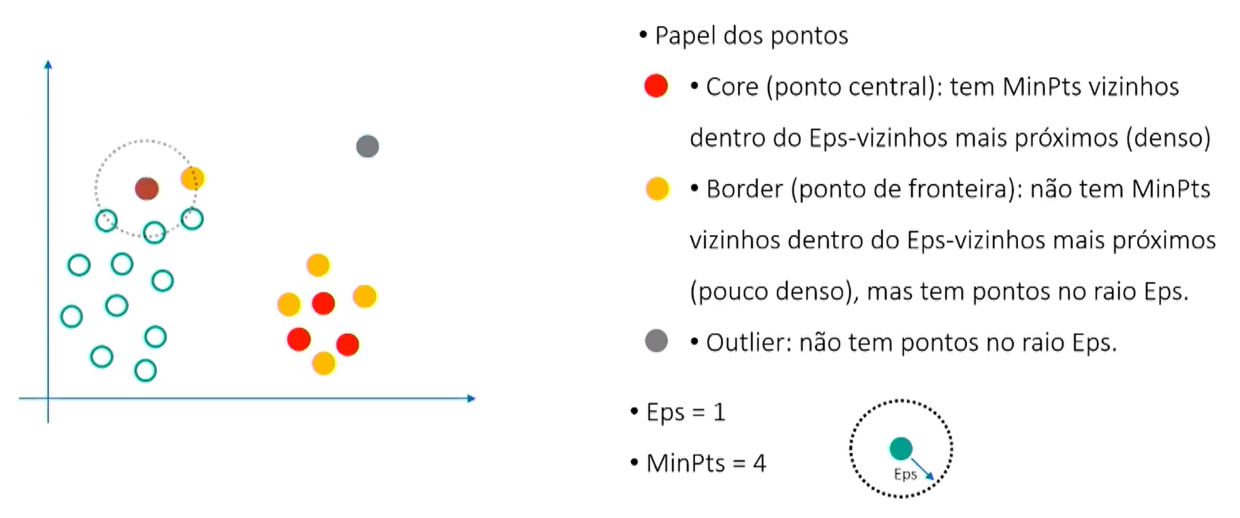

In [1]:
#Contrução do algoritimo
from IPython.display import Image
Image(filename="imagens/dbscan.png")

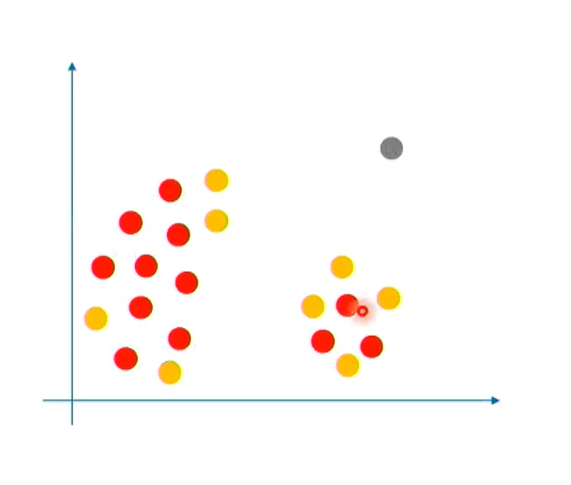

In [2]:
from IPython.display import Image
Image(filename="imagens/dbscan2.png")

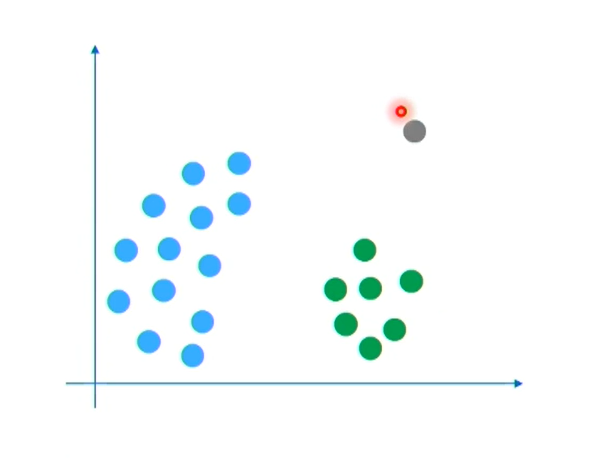

In [3]:
from IPython.display import Image
Image(filename="imagens/dbscan1.png")

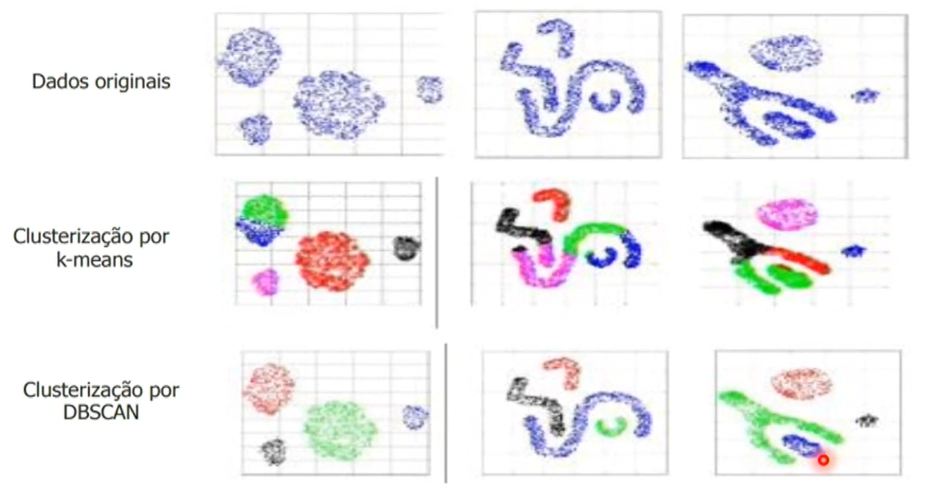

In [4]:
#Diferença entre K-means e DBSCAN
from IPython.display import Image
Image(filename="imagens/dbxkm.png")

## $$Objetivo:$$

## $$Formar~ grupos ~identificando~ as ~relações~ dos~ estudantes~com ~as~ notas~ das~ matérias$$$$utilizando~o~algoritmo~DBSCAN$$

In [5]:
#Bibliotecas
import pandas as pd
import sklearn.datasets  as dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

## Banco de dados

In [6]:
# Banco de dados
dados = pd.read_csv('notas_categ.csv',encoding='latin1',sep=',')
dados = dados.set_index('Estudante')#Transformar a var Aluno em index
dados = dados[['Mkt','Atuaria']]
dados.head()

,Mkt,Atuaria
Estudante,,
Adelino,10.0,10.0
Renata,10.0,10.0
Giulia,10.0,10.0
Felipe,9.0,9.0
Cecília,7.0,10.0


**Temos notas de 2 disciplinas ,  Marketing e Atuarias**

**OBS: Os dados não precisam ser padronizados pois estão na mesma escala**

Text(0, 0.5, 'Notas de Atuaria')

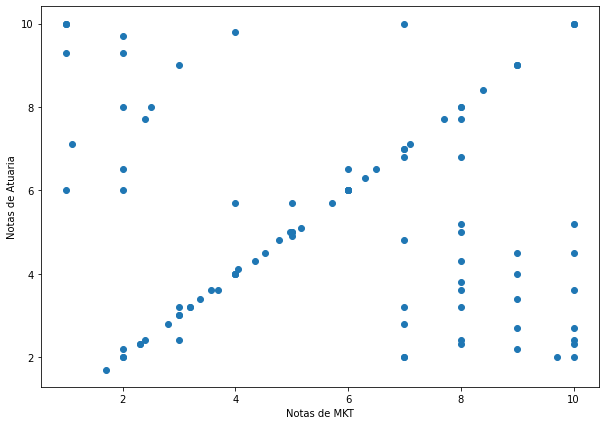

In [7]:
# Scatter plot
fig,axes =plt.subplots(figsize=(10,7))
plt.scatter(dados.Mkt,dados.Atuaria)
plt.xlabel('Notas de MKT')
plt.ylabel('Notas de Atuaria')

**Note que os dados não seguem nenhum padrão, dados completamente aleatórios**

#  Algoritimo de Clusterização DBSCAN

**Para definir o número de clusters também temos que definir 2 hiperparâmetros:**

- ####  eps: tamanho do raio 

- #### min_samples: número de dados dentro do raio


## Criar 1° Modelo

In [8]:
#Modelo
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2, min_samples=5).fit(dados)


In [9]:
#Classificar cada aluno com seu cluster gerado
dados['Cluster']=clustering.labels_
dados

,Mkt,Atuaria,Cluster
Estudante,,,
Adelino,10.0,10.0,0
Renata,10.0,10.0,0
Giulia,10.0,10.0,0
Felipe,9.0,9.0,0
Cecília,7.0,10.0,-1
...,...,...,...
Ester,3.0,3.2,0
Elaine,2.0,2.0,0
Carolina,2.0,2.0,0


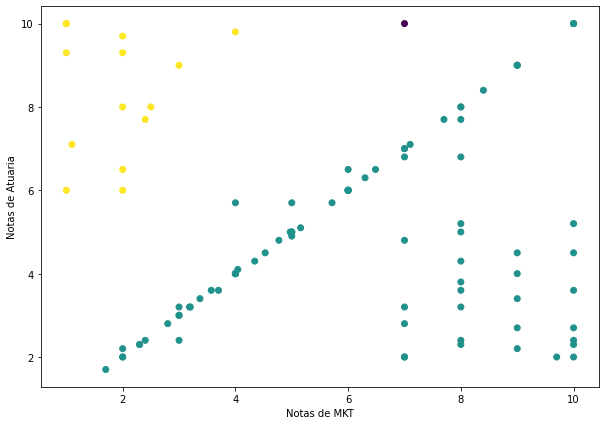

In [10]:
# Scatter plot
import matplotlib.pyplot as plt
fig,axes =plt.subplots(figsize=(10,7))
plt.scatter(dados.Mkt,dados.Atuaria,c=dados.Cluster)
plt.xlabel('Notas de MKT')
plt.ylabel('Notas de Atuaria');


**Observando apenas o gráfico não podemos tirar conclusões da clusterização gerada, precisamos fazer uma analisar descritiva dos dados clusterizados**

# Análise Descritiva

In [11]:
dados_group = dados.groupby('Cluster')[dados.columns].mean()
dados_group = dados_group.drop('Cluster',axis=1)
dados_group['N_Alunos'] = dados.Cluster.value_counts()
dados_group

,Mkt,Atuaria,N_Alunos
Cluster,,,
-1,7.000000,10.000000,1
0,6.330272,4.702381,84
1,1.866667,8.426667,15


**Note que foi criado 3 grupos, o cluster de número -1 está representando outlier, o número 0 são os alunos que tem notas medianas, já o cluster de número 1 são os alunos que tiram boas notas na matéria de atuarias, porém não em MKT**

## Criar 2° Modelo

In [12]:
#Modelo
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=2).fit(dados)
dados['cluster']=clustering.labels_


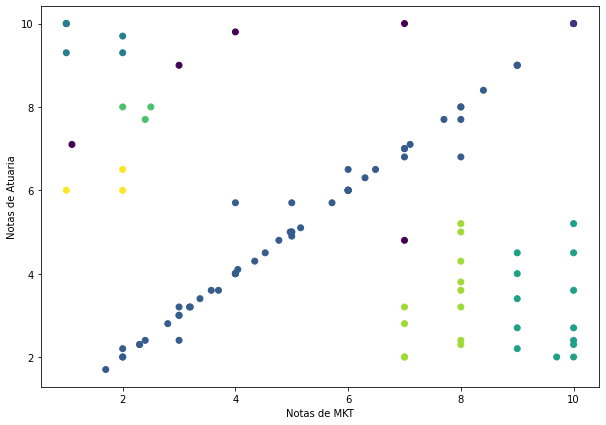

In [13]:
# Scatter plot
import matplotlib.pyplot as plt
fig,axes =plt.subplots(figsize=(10,7))
plt.scatter(dados.Mkt,dados.Atuaria,c=dados.cluster)
plt.xlabel('Notas de MKT')
plt.ylabel('Notas de Atuaria');

**Assim como no 1° modelo, não conseguimos fazer interpretações do gráfico com os clusters gerados**

# Análise Descritiva

In [14]:
dados_group1 = dados.groupby('cluster')[dados.columns].mean()
dados_group1 = dados_group1.drop('cluster',axis=1)
dados_group1 = dados_group1.drop('Cluster',axis=1)
dados_group1['N_Alunos'] = dados.cluster.value_counts()
dados_group1

,Mkt,Atuaria,N_Alunos
cluster,,,
-1,4.420000,8.140000,5
0,10.000000,10.000000,3
1,5.055325,5.070909,55
2,1.333333,9.716667,6
3,9.592308,3.192308,13
4,2.300000,7.900000,3
5,7.666667,3.316667,12
6,1.666667,6.166667,3


**Alterando os parâmetros: eps e min_samples, mudamos completamente o número de clusters, porém sempre dando coerência na interpretação dos dados, note que o cluster de número 0 tem 3 alunos com nota máxima nas 2 disciplinas e o cluster de número 1 informa que 55 alunos em média tiveram nota 5 nas duas disciplinas, entre outros insights que poderia ser analisado com outros clusters**

## Conclusão:

**Modelo DBSCAN é o Método Não-Supervisionado que tem mais interferência humana na formação dos clusters, pois somos nós que determinamos o tamanho do raio e o mínimo de pontos dentro dele para ser considerado um cluster, podemos usar o DBSCAN para encontrar grupos muito específicos diminuindo o valor do parametro eps e aumentando o número de amostras dentro do raio**